# EssentiallyR

Getting started with R

![](https://static1.squarespace.com/static/597b53473e00be6b05be544b/5b269af5f950b7fedf1e1e8d/5b3a83f7562fa75b2b911155/1530564452859/?format=1000w)

Source: [Essential R: What you need to get started from Penn State](https://onlinecourses.science.psu.edu/stat485/sites/onlinecourses.science.psu.edu.stat485/files/EssentialR/index.pdf)


#### Loops in R

In [1]:
for (i in 1:27) {
    cat(letters[i])
}

abcdefghijklmnopqrstuvwxyzNA

In [11]:
for (i in sample(x = 1:26, size = 14)) cat(LETTERS[i])

BVWXTPNCRYOAKE

#### `factor()`

WE can use the function `factor()` to convert a vector to a factor:

In [12]:
cols <- c("Blue", "Blue", "Red", "Red", "Blue", "Yellow", "Green")
summary(cols)

   Length     Class      Mode 
        7 character character 

`summary(cols)` shows us the frequency for some of the levels.

In [13]:
cols[2]

[1] "Blue"

In [15]:
cols <- factor(cols)
cols[2]

[1] Blue
Levels: Blue Green Red Yellow

The `(str(cols))` reports that it is factor, and snows us the numeric representatino of it

In [16]:
str(cols)

 Factor w/ 4 levels "Blue","Green",..: 1 1 3 3 1 4 2


`levels()` shows us all the levels for a factor

In [17]:
levels(cols)

[1] "Blue"   "Green"  "Red"    "Yellow"

`table()` to see a frequency table for our factors. 

In [18]:
table(cols)

cols
  Blue  Green    Red Yellow 
     3      1      2      1 

In [20]:
b <- table(cols)
b[3]

Red 
  2

In [21]:
b[3] *4

Red 
  8

### Visualizing Qualitative Variables

`barplot()` is used for a _graphical summary_ of a factor. However, we use `table()` with `barplot()` since `barplot()` requires the values it will plot its __height__ argument in numerical form

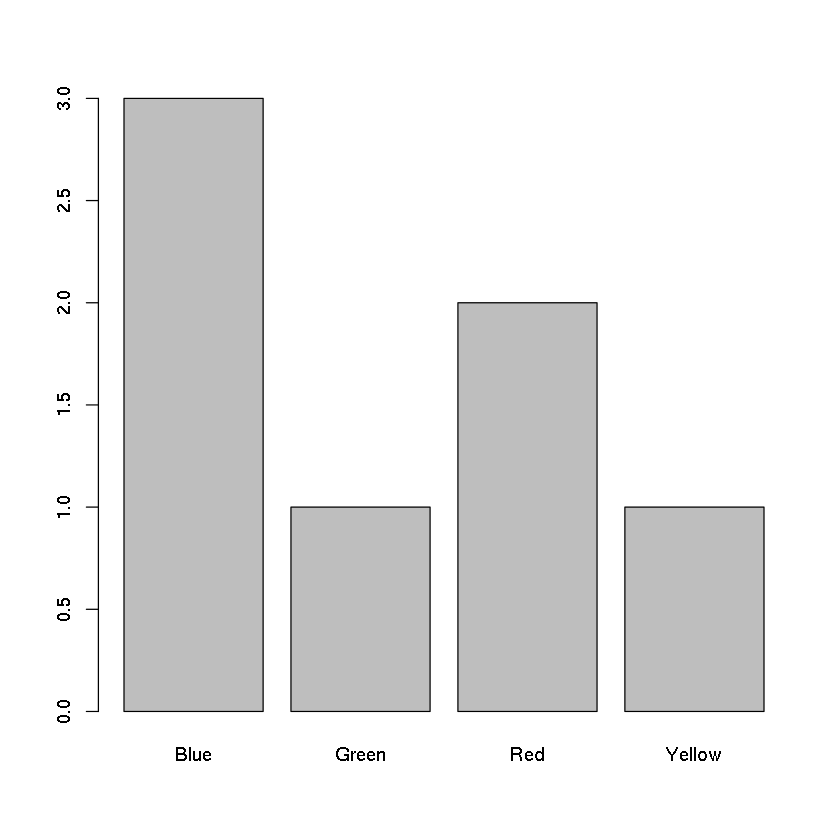

In [24]:
barplot(table(cols))

`plot(cols)` gives the barplot a second plot= because the data is categorical. 

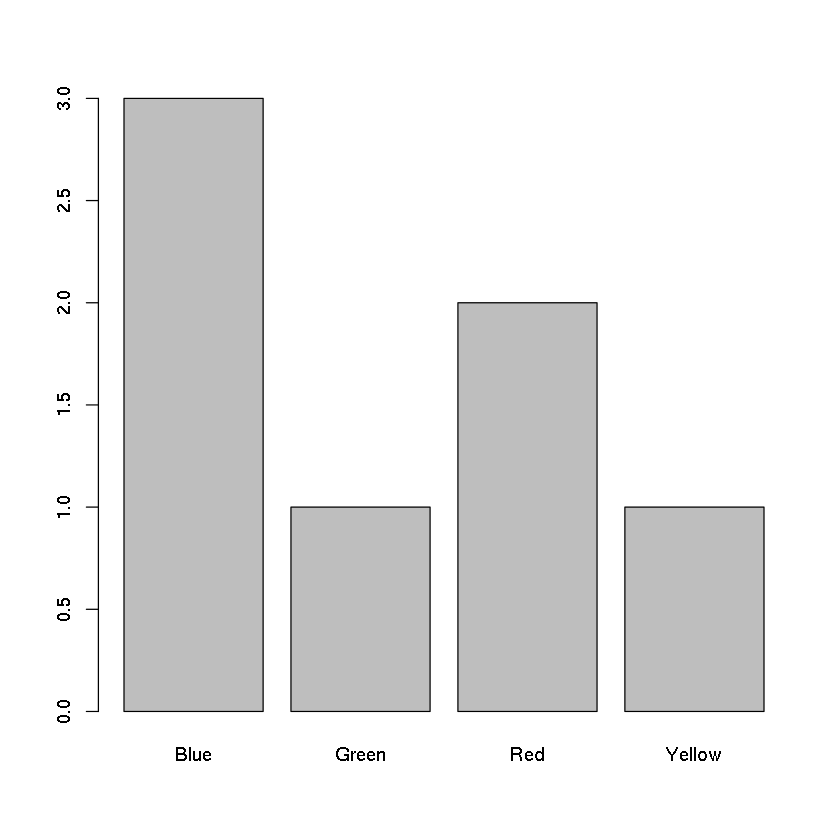

In [25]:
plot(cols)

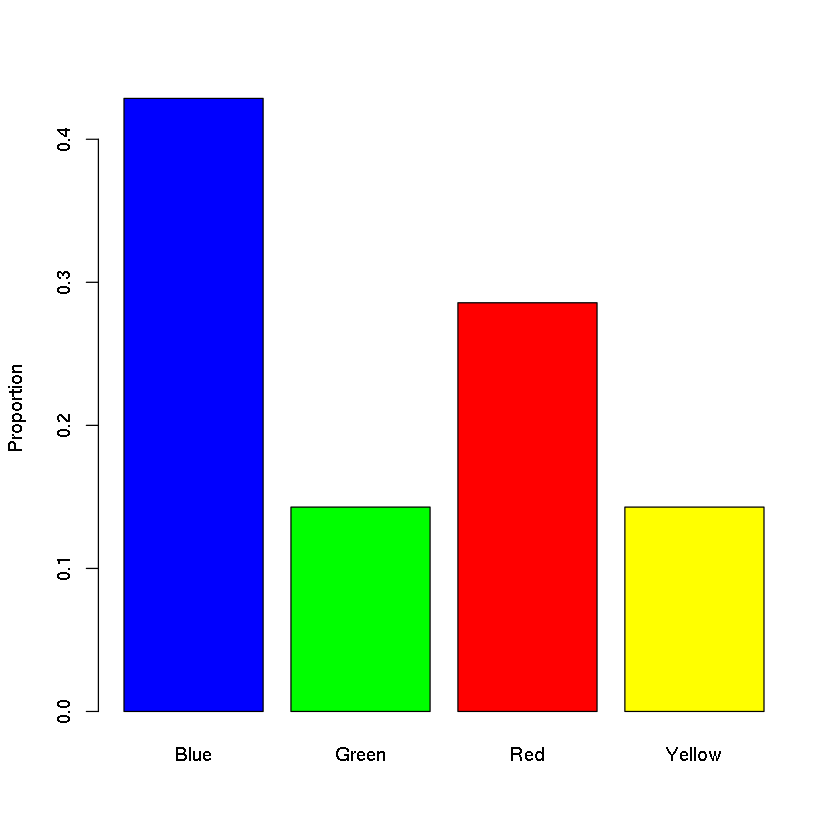

In [26]:
barplot(b/length(cols), col = c("blue", "green", "red", "yellow"),
       ylab = "Proportion")

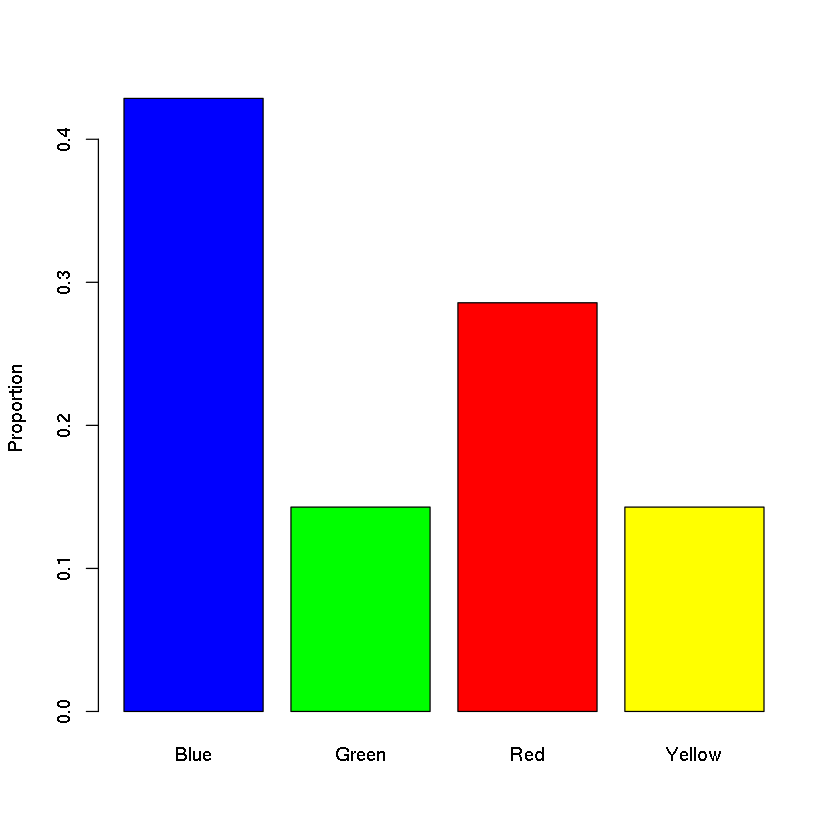

In [27]:
barplot(table(cols)/length(cols), col = levels(cols),
       ylab="Proportion")

create a pie chart

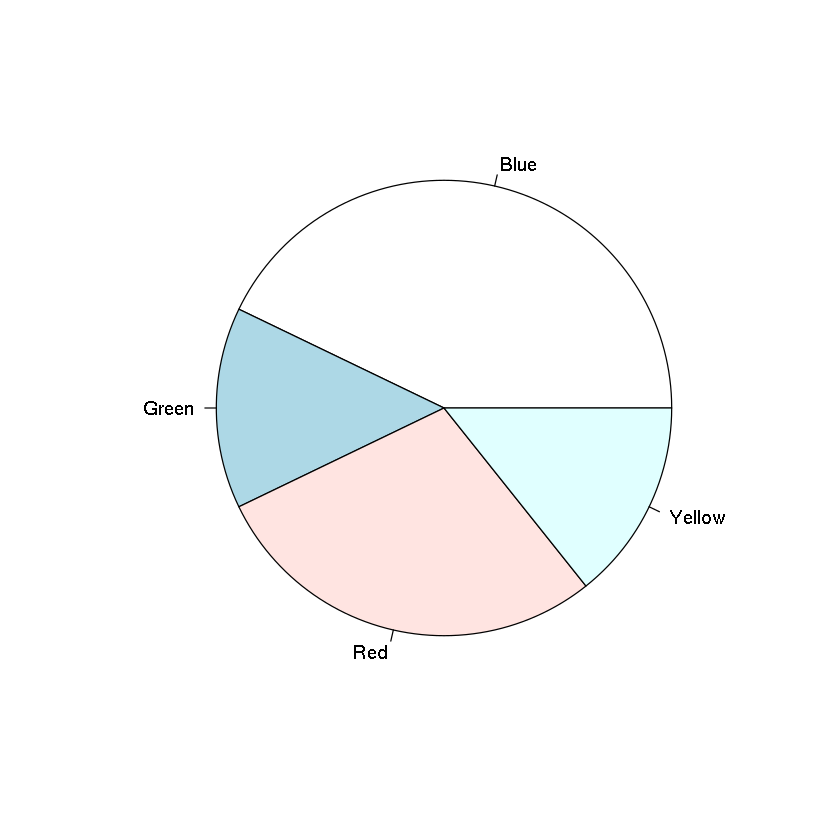

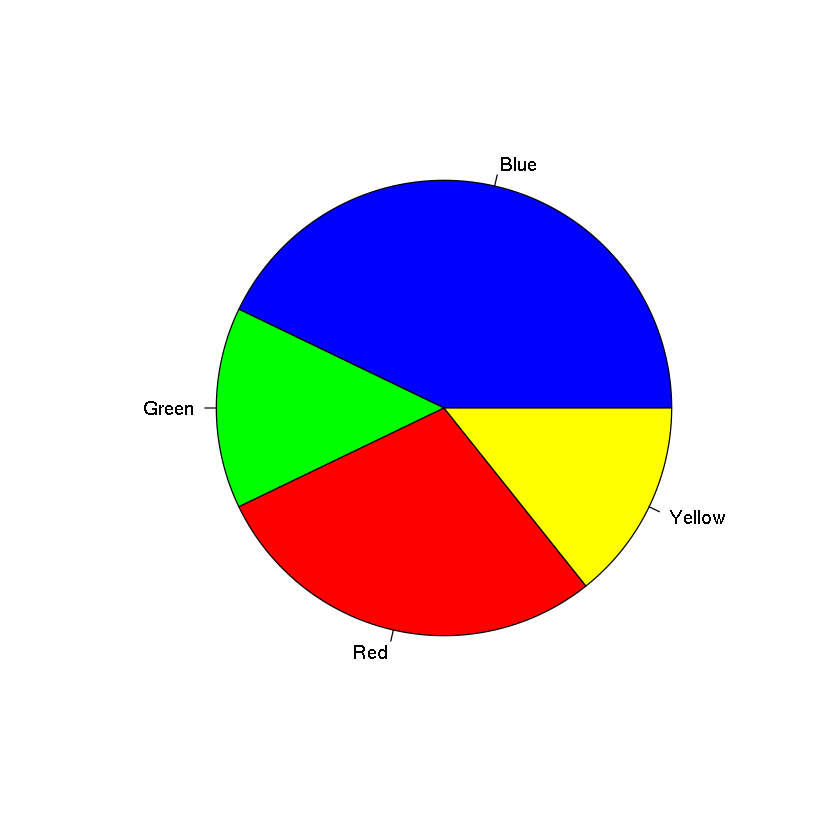

In [28]:
pie(table(cols))
pie(b, col = c("blue", "green", 'red', 'yellow'))

Numerically coded factors

In [31]:
a <- factor(scan(text = "2 4 3 3 2 1 1 2 3 4 2 3 3 4 1 3 2 1 4 3 2 4"))
table(a)

a
1 2 3 4 
4 6 7 5 

we used `scan()` when entering a longer list to be easier than using `c()`.

use `levels()` to _set_ leevls as well as to return them.

In [33]:
levels(a) <- c("<14", "15-24", "25-34", ">35")
# scan(text='some text string with spaces separating value')
table(a)

a
  <14 15-24 25-34   >35 
    4     6     7     5 

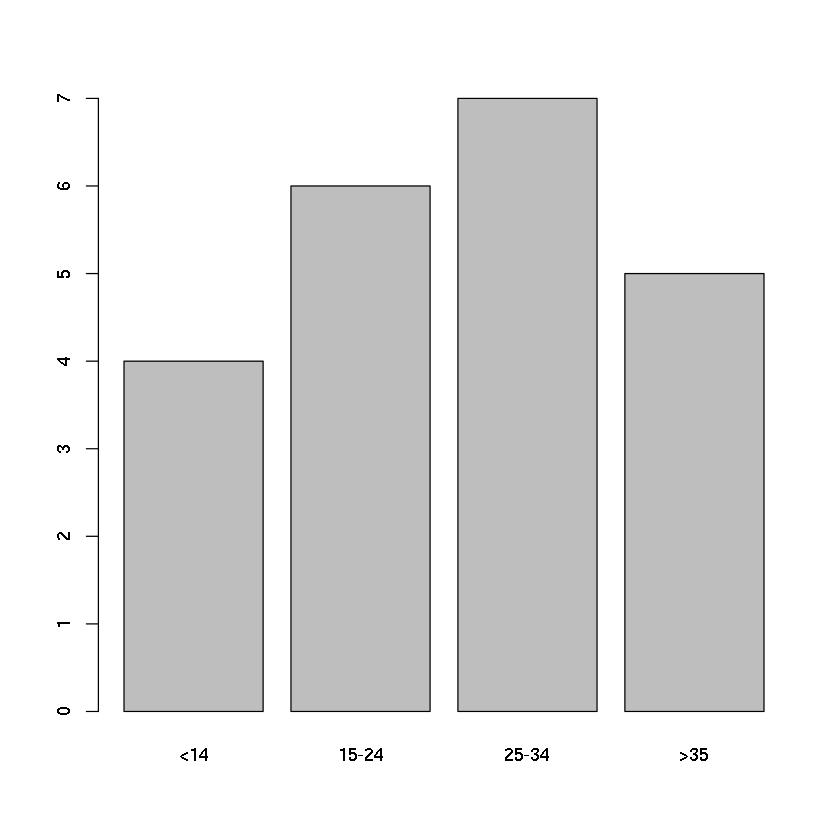

In [34]:
barplot(table(a))

#### How factors are stored in R

Factors are stores as a list of levels and an integer vector representing the elvel of each element of the factor. 

In [35]:
a <- c(1,1,4,5)
str(a)

 num [1:4] 1 1 4 5


In [37]:
(a <- as.factor(a))

[1] 1 1 4 5
Levels: 1 4 5

So our factor a, with values 1,1,4,5 has three levels: 1 4 5.


In [38]:
str(a)

 Factor w/ 3 levels "1","4","5": 1 1 2 3


In [39]:
levels(a)

[1] "1" "4" "5"

use `as.numeric()` to convert factors to numeric.  However as you can see in this case we dont get the original values, __we get the integer representation__

In [40]:
as.numeric(a)

[1] 1 1 2 3

In [41]:
str(a)

 Factor w/ 3 levels "1","4","5": 1 1 2 3


This can be solved by frist converting to character and then to numeric __to return the orignal values__

In [42]:
as.numeric(as.character(a))

[1] 1 1 4 5

mixed character factors

In [43]:
(b <- c("-.1", "2.7", "B"))

[1] "-.1" "2.7" "B"

In [44]:
str(b)

 chr [1:3] "-.1" "2.7" "B"


In [45]:
as.numeric(b)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] -0.1  2.7   NA

#### Chancing FActor LEvels

In [46]:
cols <- factor(c("Blue", "Blue", "Red", "Red", "Bleu", "Yellow", "Green"))
levels(cols)

[1] "Bleu"   "Blue"   "Green"  "Red"    "Yellow"

In [47]:
levels(cols) <- c("B", "B", "G", "R", "Y")
levels(cols)

[1] "B" "G" "R" "Y"

In [49]:
levels(cols) <- c("Yellow", "Blue", "Green", "Red")
levels(cols)

[1] "Yellow" "Blue"   "Green"  "Red"

In [54]:
cols

[1] Yellow Yellow Green  Green  Yellow Red    Blue  
Levels: Yellow Blue Green Red

In [55]:
cols[-6]

[1] Yellow Yellow Green  Green  Yellow Blue  
Levels: Yellow Blue Green Red

use the `droplevels()` functio nto drop unused factor levels

In [56]:
droplevels(cols[-6])

[1] Yellow Yellow Green  Green  Yellow Blue  
Levels: Yellow Blue Green

use the `levels = ` argument of `factor()` to __set the orders__

In [57]:
x <- factor(c("L", "M", "H"))
y <- factor(x, levels = c("L", "M", "H"))
x

[1] L M H
Levels: H L M

In [58]:
y

[1] L M H
Levels: L M H

levels are listed from _lowest to highest_

In [60]:
z <- factor(x, levels = c("L", "M", "H"), ordered = TRUE)
z

[1] L M H
Levels: L < M < H

In [61]:
str(y)

 Factor w/ 3 levels "L","M","H": 1 2 3


In [62]:
str(z)

 Ord.factor w/ 3 levels "L"<"M"<"H": 1 2 3


In [63]:
y > "L"

Warning message in Ops.factor(y, "L"):
“‘>’ not meaningful for factors”

[1] NA NA NA

In [64]:
z > "L"

[1] FALSE  TRUE  TRUE

### Hypothesis Testing for Factors

__We may want to test hypotheses about a qualitative variable. For example, if we roll a die 50 times and get
“6” 12 times how likely is it that the die is fair?__ (This really is a factor - it just have numeric levels.)

__defintion:__ `prop.test` can be used for testing the null that the proportions (probabilities of success) in several groups are the same, or that they equal certain given values.

use the `prop.test()` __proportion test__ to compare an observed frequency against a hypothesized frequency and calcluate a _p-value_ for the difference. 

In [66]:
prop.test(x = 12, n = 50, p = 1/6, alt = "greater")


	1-sample proportions test with continuity correction

data:  12 out of 50, null probability 1/6
X-squared = 1.444, df = 1, p-value = 0.1147
alternative hypothesis: true p is greater than 0.1666667
95 percent confidence interval:
 0.1475106 1.0000000
sample estimates:
   p 
0.24 


__interpretation:__ _(above)_ we observed frequency is 12 out of 50, and the theoretial probability is 1/6. Our _alternative hypothesis_ is that the probability is greater than 1/6.

The p-value here is 0.115, so we __dont have very strong evidence of an unfair die__.

Test 2:

Another way to approach this question is to simulate the problem in R. 
1. `sample()` function is used to _randomly choose values_ so sample(1:6) would be like rolling a fair die, 
2. `sample(1:6, size=50, replace=TRUE)` like rolling the die 50 times. 
3. add the logical test `==6` asks: _how many 6's come up_
4. calling `sum()` on the logical test _adds up the number of TRUEs_

In [67]:
# roll a die 50 times
sample(x = 1:6, size = 50, replace = TRUE) 

[1] 3 2 4 2 5 2 1 5 4 1 2 2 4 1 5 1 4 3 6 2 2 1 1 6 3 4 5 4 1 5 2 3 1 3 6 4 2 5
[39] 1 4 2 4 1 6 1 4 1 4 3 1

In [68]:
# how many times is it 6?
sum(sample(1:6, 50, TRUE)==6) 

[1] 12

If we repeat this 100 times we could see _how frequent a value of 12 or greater is_ using a `loop`. 
1. create a vector of `NAs` to store the data
2. use the loop to run `sum(sample(1:6, 50, TRUE)==6)` 100 times

In [69]:
die <- rep(NA, 100) # vector to store results
for (i in 1:100){
    die[i] <- sum(sample(1:6, 50, TRUE)==6)
}
table(die)

die
 2  4  5  6  7  8  9 10 11 12 13 14 15 17 
 2  7  8 10 14 14 13 12  7  6  3  1  2  1 

In [70]:
sum(die >= 12)

[1] 13

so a value of 12 or greater comes up 13% of the time, which is a bit different from the p-value we got from `prop.test()`, to get a more stable p-value we prob need to try this 1000 time rather than a hundred. 

In [72]:
prop.test(x = 12, n = 10000, p=1/6, alt = "greater")


	1-sample proportions test with continuity correction

data:  12 out of 10000, null probability 1/6
X-squared = 1970.1, df = 1, p-value = 1
alternative hypothesis: true p is greater than 0.1666667
95 percent confidence interval:
 0.0007114301 1.0000000000
sample estimates:
     p 
0.0012 


here our observed frequency is 12 out 10000 with the theoretical probability os 1/6 and alternative hypothesis is that the probability is greater than 1/6. 

# Chapter 3: Quantitative Variables

### working with numeric data

we begin with some data that represents the size of a group of mp3 files (in MB) and return some summary statistics

In [1]:
mp3 <- scan(text = "5.3 3.6 5.5 4.7 6.7 4.3 4.3 8.9 5.1 5.8 4.4")
mean(mp3)

[1] 5.327273

In [2]:
var(mp3)

[1] 2.130182

In [3]:
sd(mp3)

[1] 1.459514

In [4]:
median(mp3)

[1] 5.1

In [5]:
summary(mp3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.600   4.350   5.100   5.327   5.650   8.900 

`fivenum()` returns the upper and lower hinges, while the `summary()` returns the 1st and 3rd quartiles, and these can differ signtly depending on the number of data points 

In [6]:
fivenum(mp3)

[1] 3.60 4.35 5.10 5.65 8.90

`quantile()` can return any desired result

In [7]:
quantile(mp3, c(0.25, 0.75))

25%  75% 
4.35 5.65

In [8]:
quantile(mp3, c(0.18, 0.36, 0.54, 0.72, 0.9))

18%  36%  54%  72%  90% 
4.30 4.58 5.18 5.56 6.70

### Hypothesis Testing

if we thought the mean was 4.5, we could test if the data support this making a `t-test`. 

___t___ is the difference between observed and hypothesized means in units of the standard error and the standard error of the mean is standard deviaiton divided by the square root of _n_.

we use `pt()` to calcuate probabilities for __t-distributions__


In [11]:
t <- (mean(mp3) - 4.5) / (sd(mp3)/sqrt(length(mp3)))
t

[1] 1.879909

`pt()`: Density, distribution function, quantile function and random generation for the t distribution with df degrees of freedom (and optional non-centrality parameter ncp).

In [14]:
pt(t, df = length(mp3) - 1, lower.tail = FALSE) * 2 # *2 for 2 sided test

[1] 0.08953719

built in functino for the __t-test__:

In [15]:
t.test(mp3, mu = 4.5)


	One Sample t-test

data:  mp3
t = 1.8799, df = 10, p-value = 0.08954
alternative hypothesis: true mean is not equal to 4.5
95 percent confidence interval:
 4.346758 6.307788
sample estimates:
mean of x 
 5.327273 


### Resistant measures of center and spread

since the mean and standard deviation can be quite sensitive to ourliers, it is sometimes useful to consider adding an outlier to our mp3 data and experiment

In [16]:
mean(mp3)

[1] 5.327273

In [17]:
mp3[8] <- 10.8
mean(mp3)

[1] 5.5

In [18]:
median(mp3)

[1] 5.1

The _median is substantially lower_ than the mean

In [19]:
mean(mp3, trim = 0.1)

[1] 5.122222

The trimed mean is much closer to the median. 

__Trimming mean__ more of the data will get still closer to the median. 

For __resistance measures of spread__ one candidate is the __"Interquartile range"__ IQR: which is the difference between the 3rd and 1st quartiles. 


In [20]:
IQR(mp3)

[1] 1.3


Another canidate is the __"median absolute deviatin (MAD)"__ which is the median of the absoluate differences from the median, scaled by a constant. 

Compute the median absolute deviation, i.e., the (lo-/hi-) median of the absolute deviations from the median, and (by default) adjust by a factor for asymptotically normal consistency.

In [21]:
median(abs(mp3 - median(mp3))) * 1.4826

[1] 1.03782

In [22]:
mad(mp3)

[1] 1.03782

### Visualizing Quantitative Data

most common is the __histogram__

In [24]:
# add another album mp3 file
mp3[8] <- 8.9
mp3 <- c(mp3, scan(text = "4.9 5 4.9 5.4 6.2 5.6 5.1 5.8 5.5 6.7 7"))


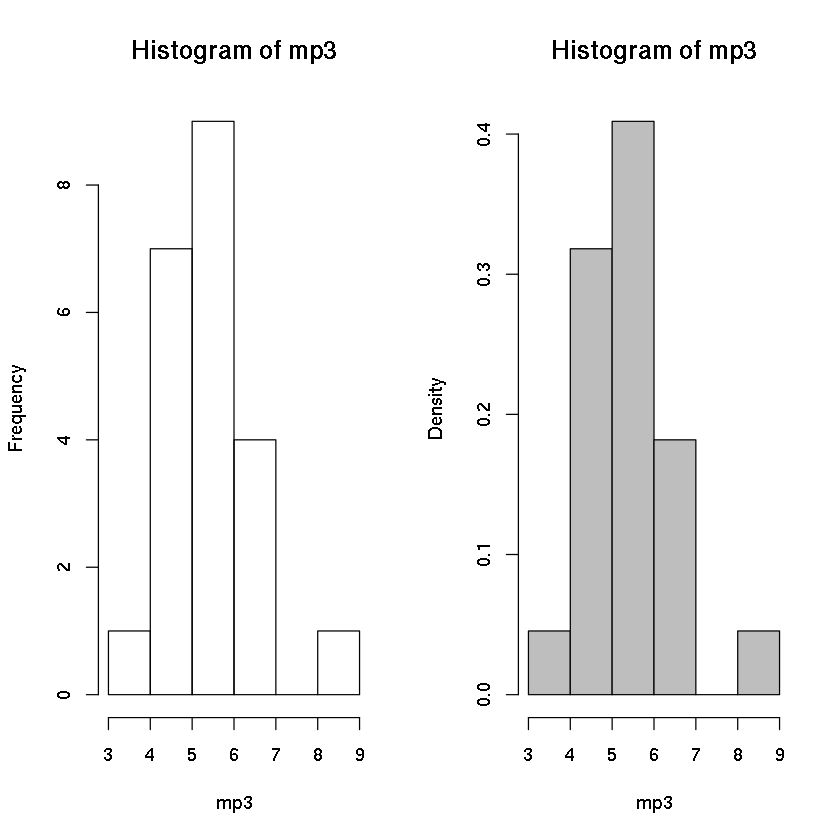

In [26]:
par(mfrow = c(1,2)) # split the plot
hist(mp3)
hist(mp3, prob = TRUE, col = "grey")

we have 2 versins of the histogram
1) y-axis units of _frequency_ so the scale changes for differing n

2) units of _probability_ so distribution with differing _n_ can be compared

Anonother useful visualization is the __Kernel Density estimate (KDE) (density estimate)__ which is a probability density function

`density()`:The (S3) generic function density computes kernel density estimates. Its default method does so with the given kernel and bandwidth for univariate observations.

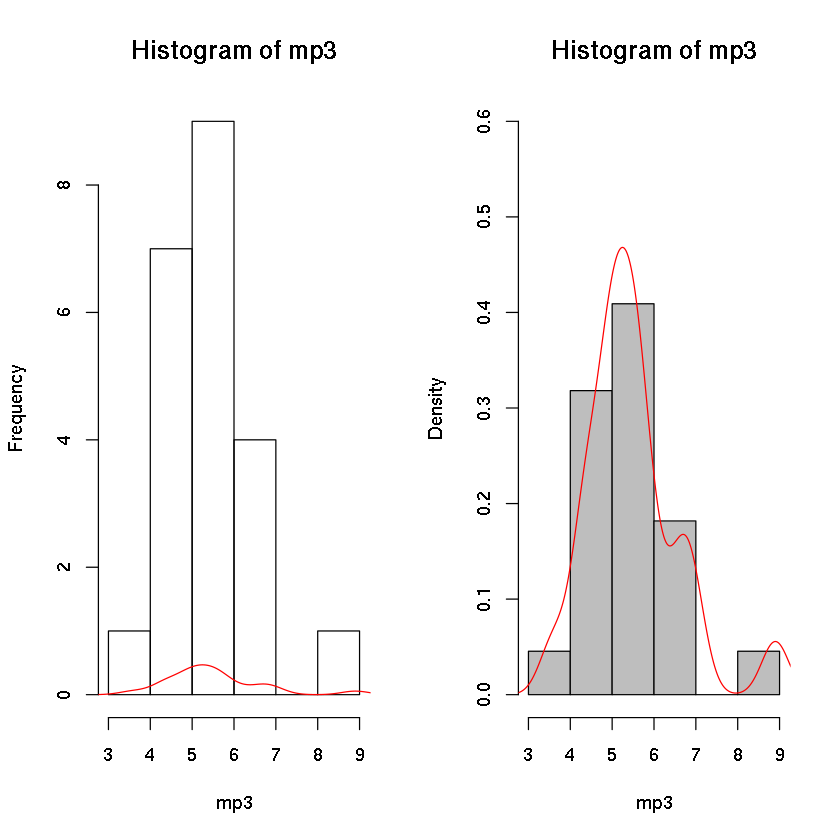

In [30]:
par(mfrow = c(1,2))  # split the plot
hist(mp3)
lines(density(mp3), col = "red")

hist(mp3, probability = TRUE, col = 'grey', ylim = c(0, 0.6))
lines(density(mp3), col = 'red')

`rnorm()` used to generate some random data from the __normal distribution__

The r in `rnorm()` means “random”; runif() generates some uniformly distributed random data,

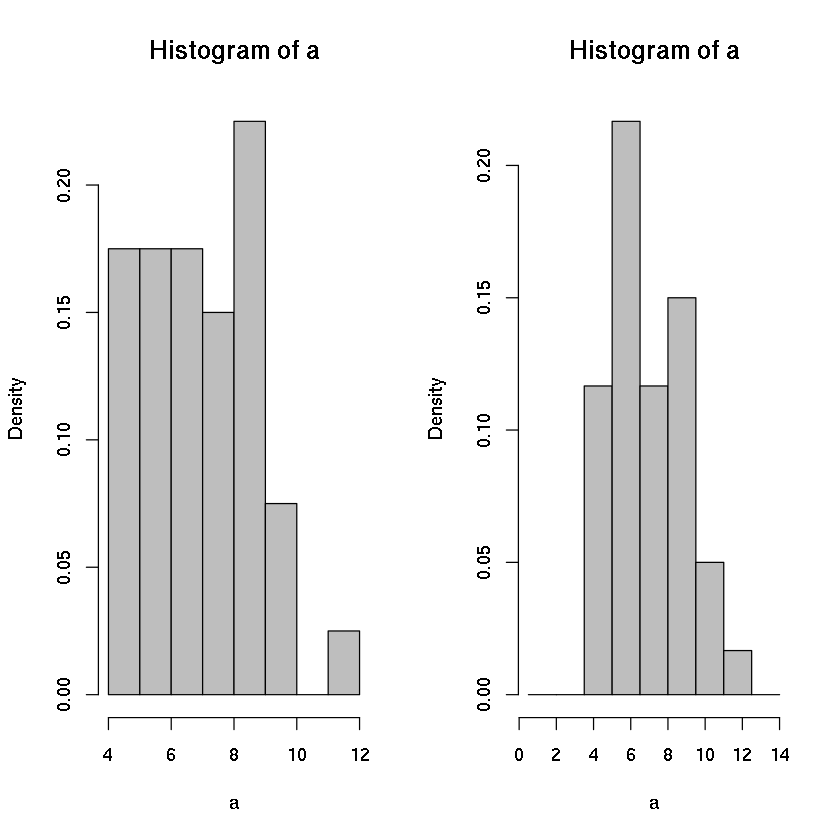

In [31]:
par(mfrow = c(1,2)) #split the plot
a <- rnorm(n = 40, mean = 7, sd = 2)
hist(a, prob = T, col = "grey")
hist(a, prob = T, col = "grey", breaks = seq(0.5, 14, 1.5))

(above) both graphs show the same data, however the `breaks = ` argument can be used to specify where the bins are in the histogram. Here we used th function `seq()` to create a sequence with lower and upper bounds and step size (.5 14 1.5)

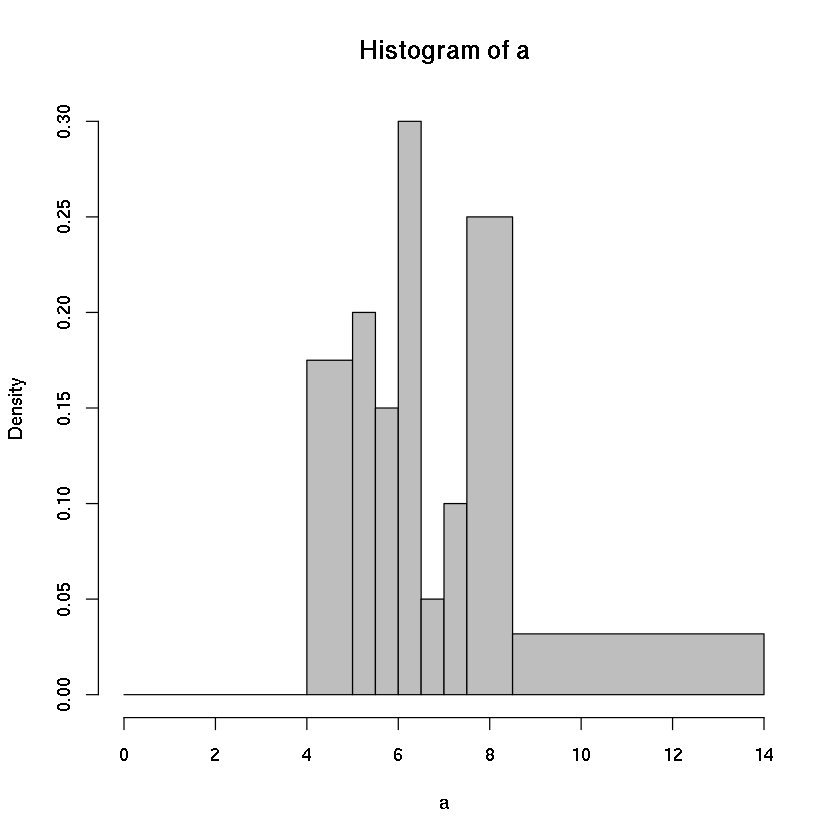

In [32]:
hist(a, prob = T, col = "grey", breaks=c(0,4,5,5.5,6,6.5,7,7.5,8.5,14))

#### Boxplots
useful visualization of quantitative data which shows the median, lower and upper "hinges"  and upper and lower shiskers. 

They can also be notched to show a confidence interval about the median. Values beyond the whiskers are possible _outliers_

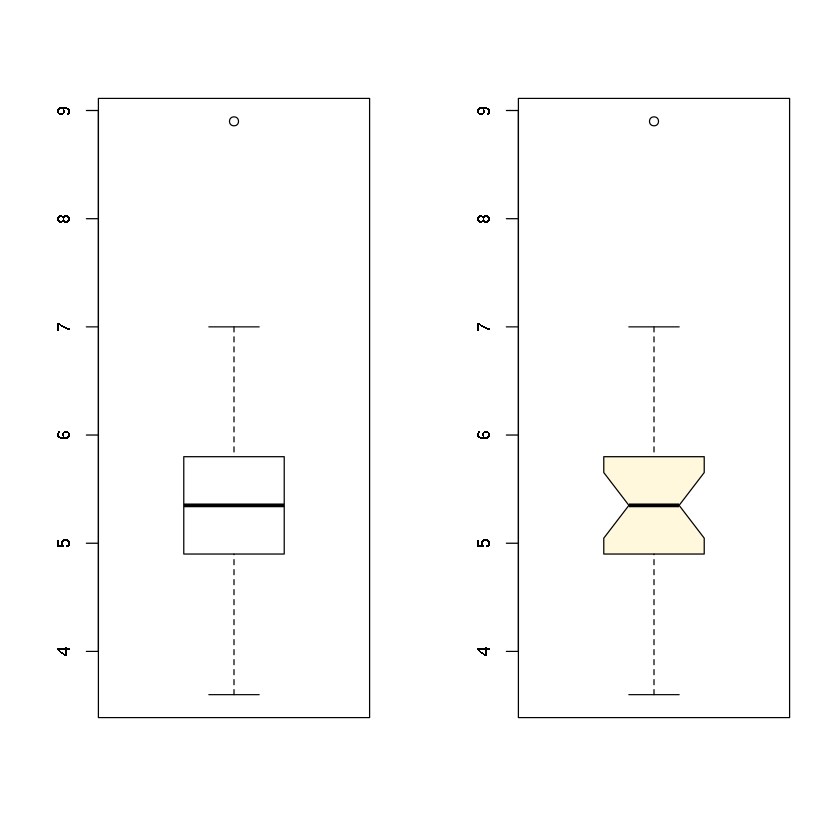

In [34]:
par(mfrow = c(1,2))
boxplot(mp3)
boxplot(mp3, notch = TRUE, col = "cornsilk")

value 8.9 appears to be the outlier

visualize "raw" data
x = indices
y = values 

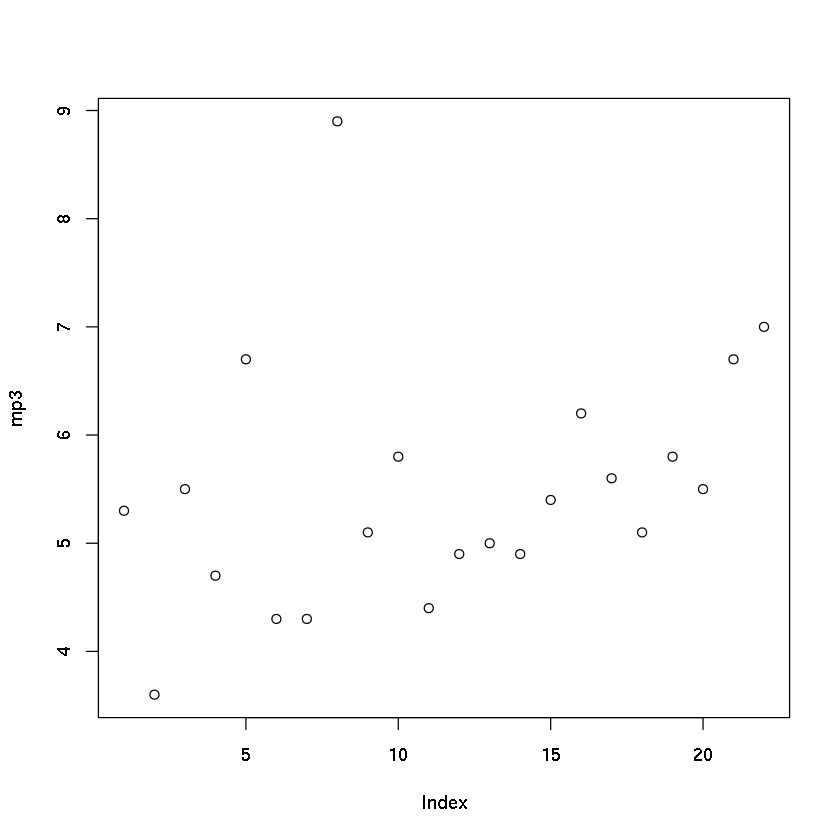

In [35]:
plot(mp3)

the advantage of letting us look
for structure in the data (though it won’t work for very large datasets).

Other plots include:
`stripchart` which is a sort of _"one-dimensional scatterplot"_. the `method = ` argument tells R how to display values that would over plot

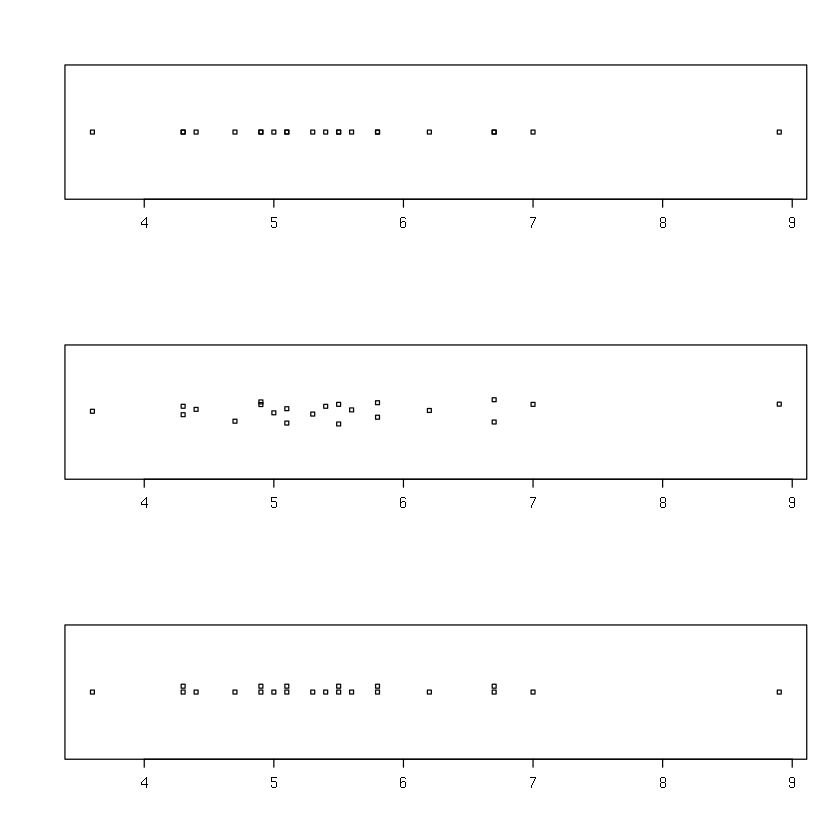

In [36]:
par(mfrow = c(3,1))
stripchart(mp3)
stripchart(mp3, method = "jitter")
stripchart(mp3, method = "stack")

`stem()` is the __stem and leaf plot__ used to quickly reconstruct the values of the data visually

In [37]:
stem(mp3)


  The decimal point is at the |

  2 | 6
  4 | 3347990113455688
  6 | 2770
  8 | 9



The stem and leaf chart shows that the lowest value is 3.6, and occurs once, while the maximum value is 8.9,
which may be an outlier

In [38]:
stem(mp3, scale = 2)


  The decimal point is at the |

  3 | 6
  4 | 334799
  5 | 0113455688
  6 | 277
  7 | 0
  8 | 9



### Converting Quantitative Data to Qualitative

`cut()` can be used to take quantitative variable and simplify it by _reducing it to catgories_

In [39]:
m.r <- cut(mp3, breaks = c(3:9)) # specify the breaks
m.r

[1] (5,6] (3,4] (5,6] (4,5] (6,7] (4,5] (4,5] (8,9] (5,6] (5,6] (4,5] (4,5]
[13] (4,5] (4,5] (5,6] (6,7] (5,6] (5,6] (5,6] (5,6] (6,7] (6,7]
Levels: (3,4] (4,5] (5,6] (6,7] (7,8] (8,9]

In [40]:
m.r[which(mp3 == 5)] # values of 5.0 coded as (4.5]

[1] (4,5]
Levels: (3,4] (4,5] (5,6] (6,7] (7,8] (8,9]

(above) the non-matching brackets (4,5] - means "greater than 4 and less than or equal to 5", so 4.0 is _not_ included, but 5.0 is included in the interval. 

Now we can treat `m.r.` like any other __factor vaeriable__ and assign other names to the levels as we see fit

In [43]:
table(m.r)

m.r
(3,4] (4,5] (5,6] (6,7] (7,8] (8,9] 
    1     7     9     4     0     1 

In [44]:
levels(m.r)

[1] "(3,4]" "(4,5]" "(5,6]" "(6,7]" "(7,8]" "(8,9]"

In [45]:
levels(m.r) <- c("tiny", "small", "medium", "med-large", "large", "huge")
table(m.r)

m.r
     tiny     small    medium med-large     large      huge 
        1         7         9         4         0         1 

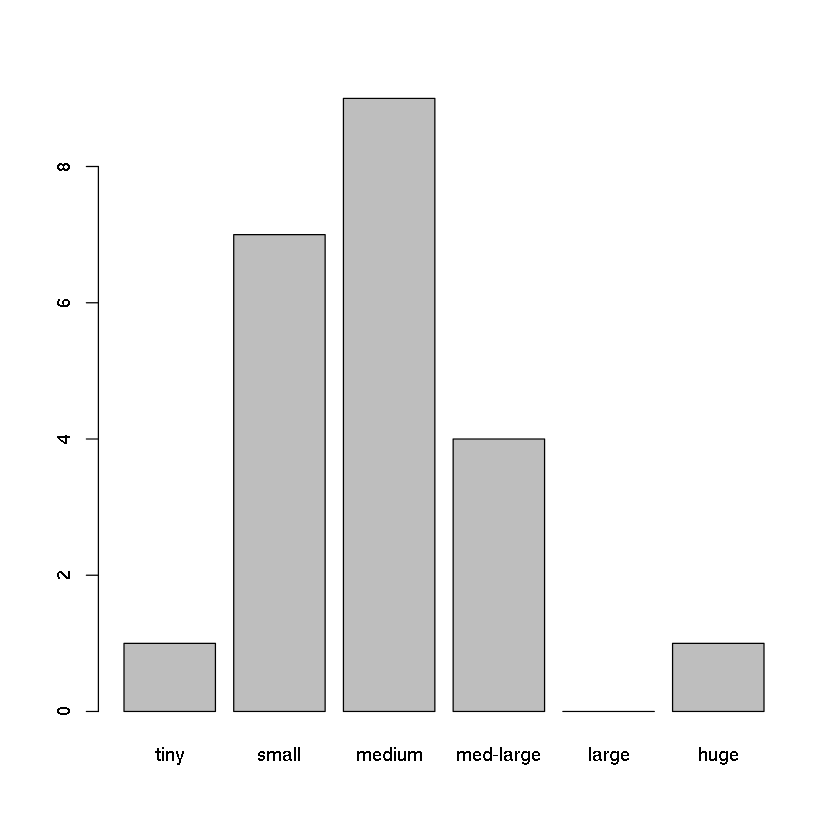

In [46]:
plot(m.r)

### Fitting and Modeling Distributions

__t-distribution__ can be examined with a group of functions:
* `dx()` - density
* `px()` - probability
* `qx()` - quantiles
* `rx()` - random samples

from the _x_ distribution. 

#### example: what would be the probabilityof value of 3 or more from an exponential distribution with a rate parameter of 1?

`pexp()` __The expoential distribution:__ Density, distribution function, quantile function and random generation for the exponential distribution with rate rate (i.e., mean 1/rate).

In [50]:
pexp(q = 3, rate = 1, lower.tail= FALSE)

[1] 0.04978707

the p-value is pretty close to 0.05, so about 1 of 20 random values from this distributino would be greater than 3. 


lets generate 100 values and see how many are greater than or equal to 3:

`rexp()`The Exponential Distribution: Density, distribution function, quantile function and random generation for the exponential distribution with rate rate (i.e., mean 1/rate).

In [61]:
x.exp <- rexp(n = 100, rate = 1)
sum(x.exp >= 3)

[1] 3

fairely cloase to a 4.97 sample size, and a large sample size would get even close:

In [65]:
sum(rexp(n = 1e+05, rate = 1) >= 3)/1000

[1] 4.96

Let’s look at how we’d investigate the fit of a distribution. Imagine we have a sample of 100 values, and we
think they come from an exponential distribution with a rate of 1.

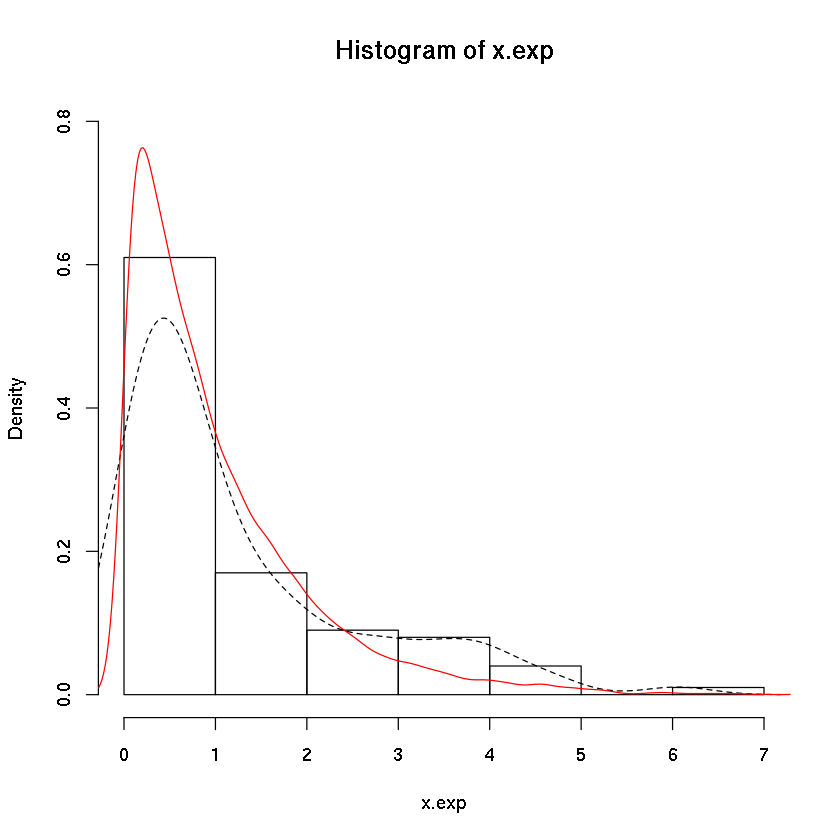

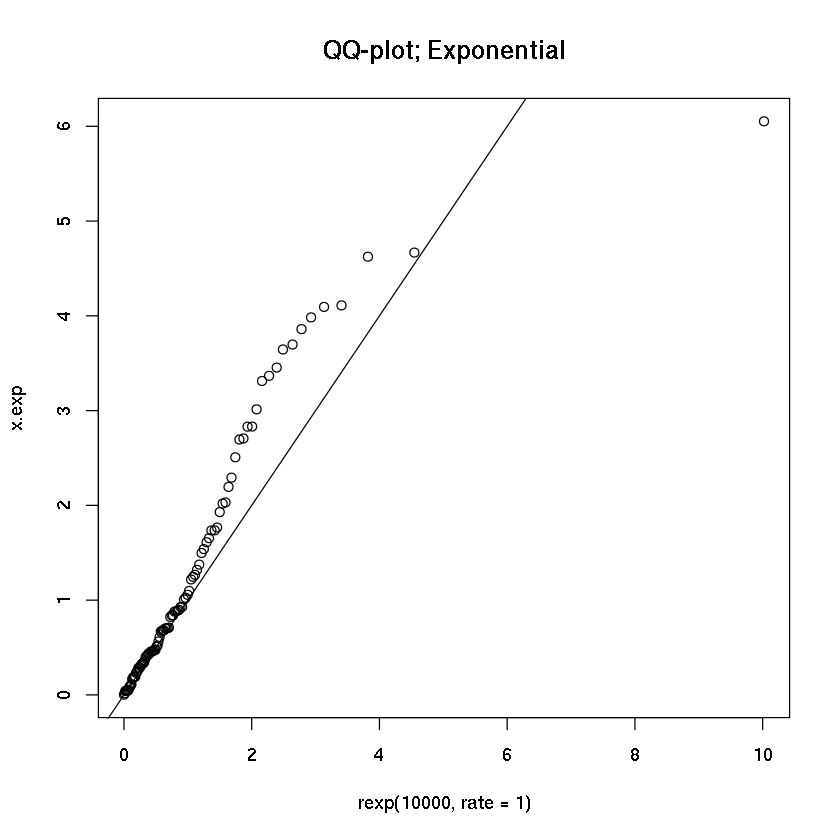

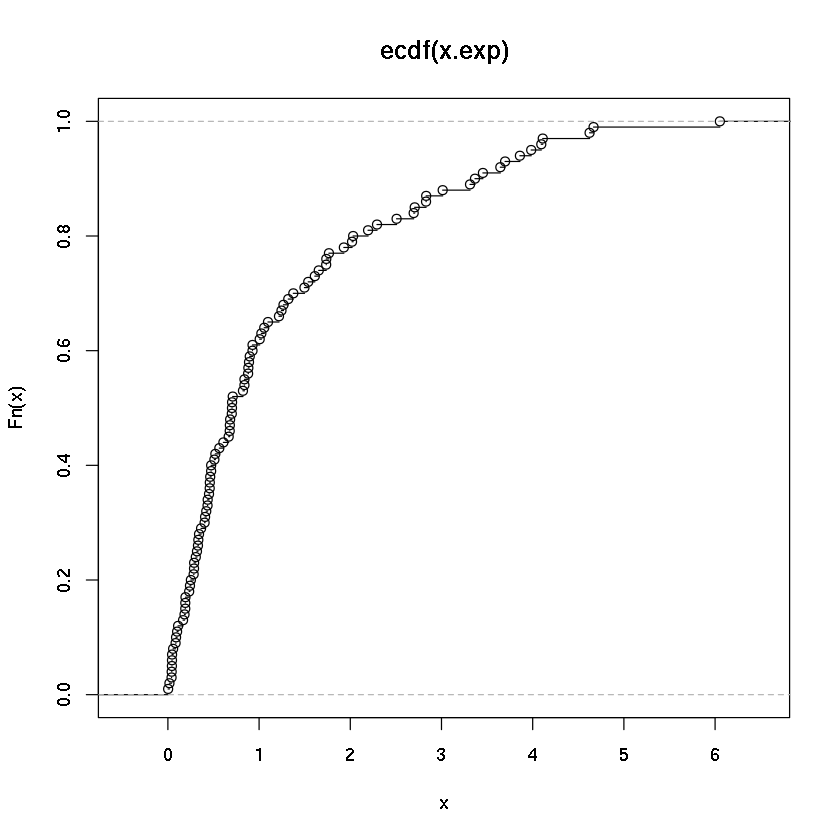

In [67]:
x.exp <- rexp(n = 100, rate = 0.7)
hist(x.exp, prob = TRUE, ylim = c(0, 0.8))
lines(density(x.exp), lty = 2)
lines(density(rexp(10000, rate = 1)), col = "red")
qqplot(x = rexp(10000, rate = 1), y = x.exp, main = "QQ-plot; Exponential")
abline(a = 0, b = 1)
plot(ecdf(x.exp), pch = 21)

The first two plots here suggest that the distribution isn’t what we hypothesize - rate=1 - (of course in
this example we know the rate is not 1, our code that generates it shows the value is 0.7).

-------------------
# Lesson 6: Working with Two Variables

* Make frequency table and carry out chi-squared test for 2 factors
* Make barplots for 2 factors
* Explore correlation between 2 numeric variables
* Fit a regression between 2 numeric variable
* Compare group means for a  continuous variable over levels of a factor

### Two Qualitative VAriables

load car data using the `scan()` function
* `cyl` - number of cylinders
* `am` - transmission type

In [68]:
cyl<-factor(scan(text=
"6 6 4 6 8 6 8 4 4 6 6 8 8 8 8 8 8 4 4 4 4 8 8 8 8 4 4 4 8 6 8 4"))
am<-factor(scan(text=
"1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1"))


In [69]:
levels(am)<-c("auto","manual")

In [71]:
table(am, cyl)

        cyl
am        4  6  8
  auto    3  4 12
  manual  8  3  2

In [72]:
table(cyl, am)

   am
cyl auto manual
  4    3      8
  6    4      3
  8   12      2

it appears that manual transmissions were more common with smaller numbers cylinders, while cars with 8 cylenders were far more likely to have automatic transmissions.

`prop.table()` to express the tables as __proportions__

In [73]:
tab <- table(cyl, am)
prop.table(tab, margin = 1)

   am
cyl      auto    manual
  4 0.2727273 0.7272727
  6 0.5714286 0.4285714
  8 0.8571429 0.1428571

`margin = 1` tells R we want proportions with _rows_.
We can see 85% of cyledner cars are audo while 72% of cars with 4 cylinders are manual

`margin = 2` makes the proportions on the _columns_. Therefore we can see that 63% of cars with automatic transmission had 8 cylinders.

In [74]:
prop.table(tab, margin = 2)

   am
cyl      auto    manual
  4 0.1578947 0.6153846
  6 0.2105263 0.2307692
  8 0.6315789 0.1538462

`margins = ` default is proportions of the entire table.. so 38% of the population of cars in this dataset are auto with 8 cylinders.

In [75]:
prop.table(tab)

   am
cyl    auto  manual
  4 0.09375 0.25000
  6 0.12500 0.09375
  8 0.37500 0.06250

`signif()` controls the number of significant digits printed

In [79]:
signif(prop.table(tab), 2)

   am
cyl  auto manual
  4 0.094  0.250
  6 0.120  0.094
  8 0.380  0.062

#### Chi-square test

we may want to ___test whether there is any association between categorical variables.___ The simplest approch is often to use th `χ2(Chi2)`test with the ___null hypothesis that the variables are indepenent___

https://en.wikipedia.org/wiki/Chi-squared_test

In [81]:
chisq.test(tab)

Warning message in chisq.test(tab):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  tab
X-squared = 8.7407, df = 2, p-value = 0.01265


In this case we ___have evidence of association between more cylinders and automatic transmission___ but we have a warning because there are two few values in some of our groups.
Chi2 is not valid if any group has <5 members.

#### visualizing the dataset

barplot 

`par()` is used to set graphical _parameters_ which we specify the plotting window is divided into 1 row and 2 columns.

`op` save hte old par settings

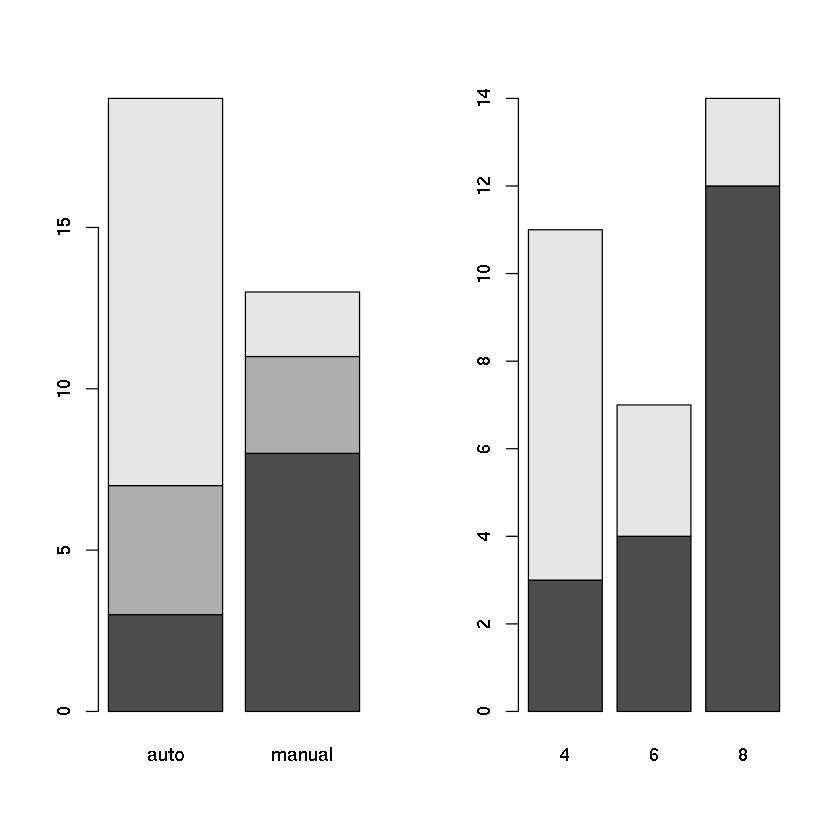

In [82]:
op = par(mfrow = c(1,2))
barplot(table(cyl, am))
barplot(table(am, cyl))

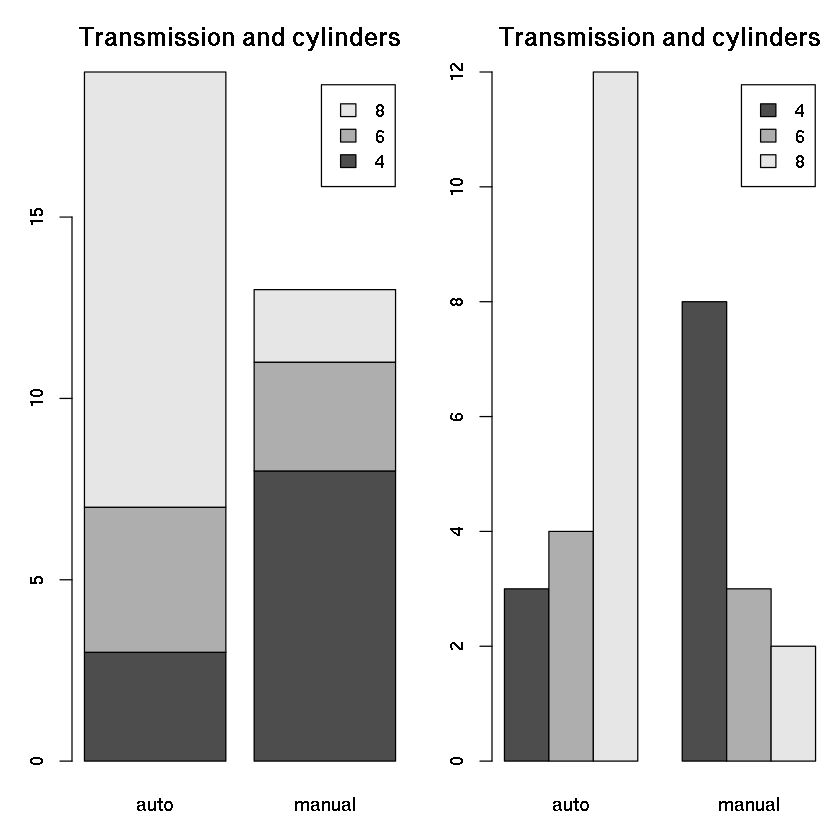

In [86]:
par(mfrow=c(1,2),mar=c(3,3,3,0.5))
barplot(table(cyl,am),legend.text=TRUE,main="Transmission and cylinders")
barplot(table(cyl,am),beside=TRUE,legend.text=TRUE,
main="Transmission and cylinders")

In [84]:
par(op)

`mosaicplot()` __mosaic plot__ which shows the proportions of each combinatino of factors.

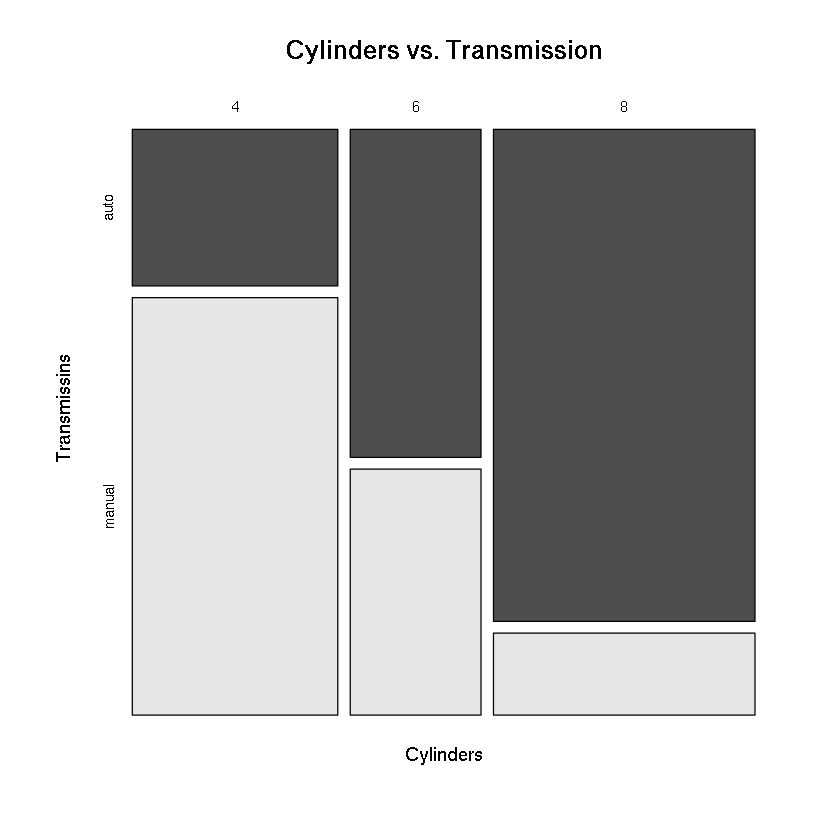

In [87]:
mosaicplot(table(cyl, am), color = T, 
          main = "Cylinders vs. Transmission",
          ylab = "Transmissins", 
          xlab = "Cylinders")

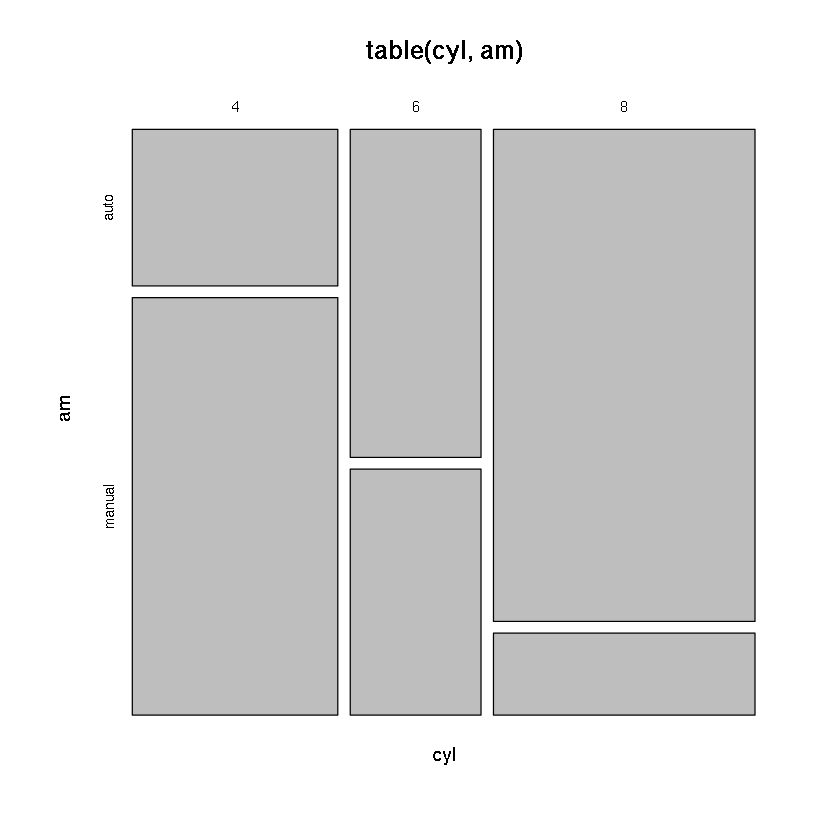

In [88]:
mosaicplot(table(cyl, am))

### Two Quantitiative Variables

assocaite between two quantitiative variables:
using the motor trend card we migth wich to looks at the association between ___engine displacement (liters) and power output (horsepower)___

In [89]:
disp=scan(text=
"2.62 2.62 1.77 4.23 5.90 3.69 5.90 2.40 2.31 2.75 2.75 4.52 4.52 4.52
7.73 7.54 7.21 1.29 1.24 1.17 1.97 5.21 4.98 5.74 6.55 1.29 1.97 1.56
5.75 2.38 4.93 1.98")

hp=scan(text=
"110 110 93 110 175 105 245 62 95 123 123 180 180 180 205 215 230
66 52 65 97 150 150 245 175 66 91 113 264 175 335 109")


##### explorting the data

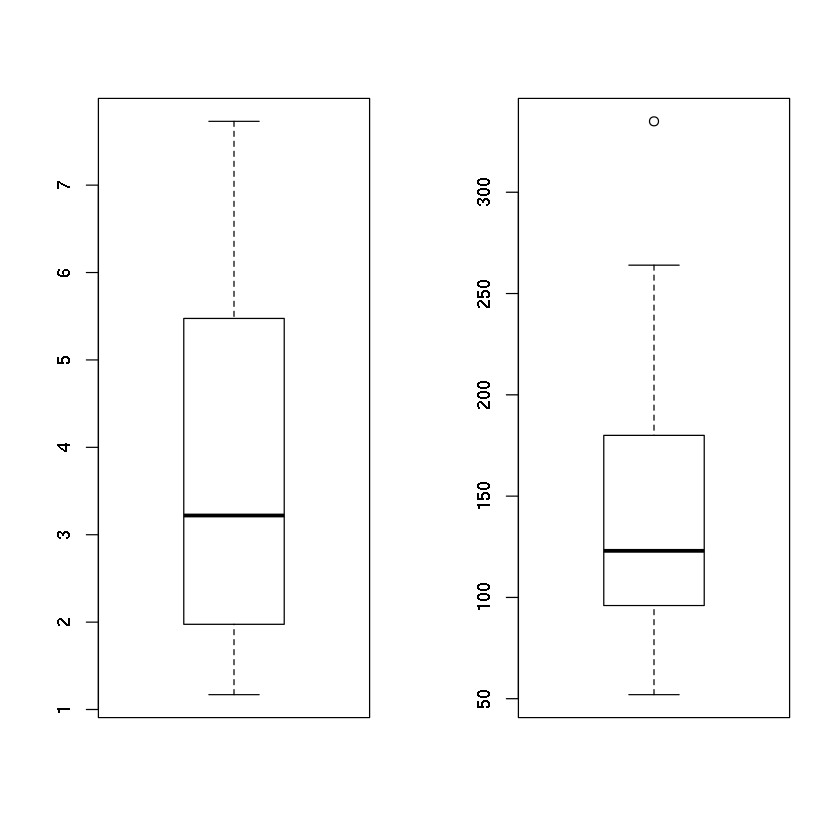

In [90]:
op = par(mfrow = c(1,2))
boxplot(disp)
boxplot(hp)

Both variables seem a bit skew, with a larger number of low values. the horsepower plot show one possible outlier. 

lets find the outlier(s)

`data()` is used to load one of the built-in data sets

`$` used to specify a variable within the dataset

`[,]` used to format [rownumber, columnnumber]  which we use to call rows with `hp`>250

In [93]:
data(mtcars) # load the whole data set
mtcars[which(mtcars$hp > 250), ]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Ford Pantera L,15.8,8,351,264,4.22,3.17,14.5,0,1,5,4
Maserati Bora,15.0,8,301,335,3.54,3.57,14.6,0,1,5,8


The search shows that only 2 cars have horse power greater than 250. 

#### Correlation

let see what/if a _correlation between displacement and power_

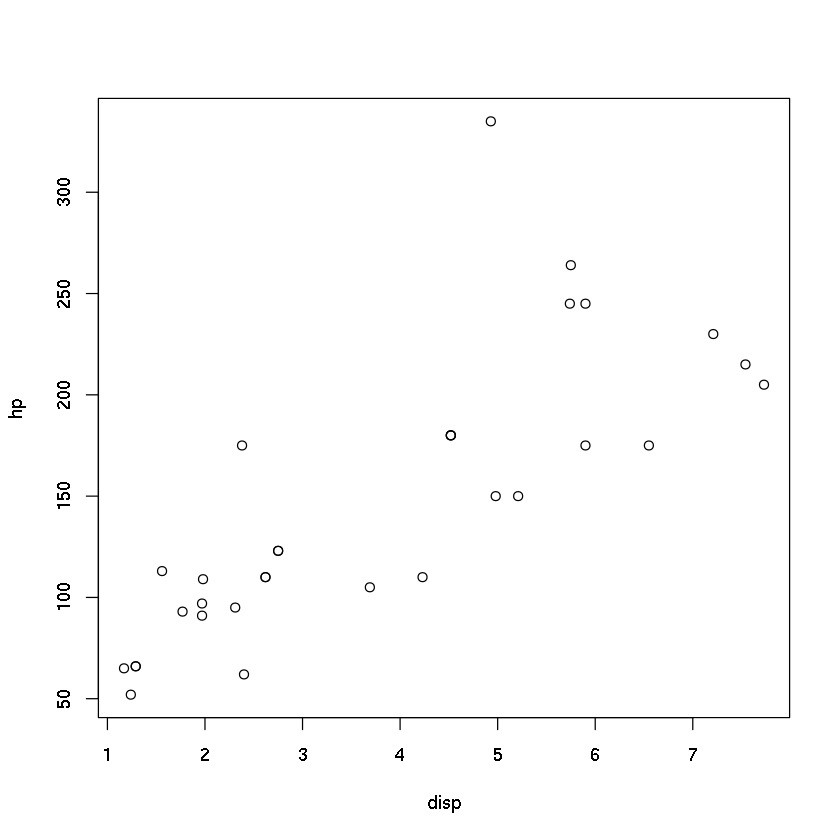

In [94]:
plot(x = disp, y = hp)

print the correlation 

`cor()` gives use the _pearson correlation_. 

In [102]:
cor(disp, hp)

[1] 0.7910567

the __correlation coefficient__ _r_ is reasonalbily high at 0.79.

for the `cor()` we can set the `method = "spearman"` argument  to get the __spearman rank correlation__ which is __more robust to outiers__: 

In [97]:
cor(disp, hp, method = "spearman", 
   use = "complete.obs")

[1] 0.85175

the `use = "complete.obs"` setting tells r how to deal with _missing values (NA)_

### Regression
To go a step further, we can _model one variable as a function of another_.

__lindear regression (regression for short)__ modeling two quantitative variables.

`lm()` __linear model__ - Fitting Linear Models `lm()` is used to fit linear models. It can be used to carry out regression, single stratum analysis of variance and analysis of covariance (although aov may provide a more convenient interface for these).

we can use this to test whether __large displacement engines should be more powerful__. 

In [99]:
model = lm(hp ~ disp)
model


Call:
lm(formula = hp ~ disp)

Coefficients:
(Intercept)         disp  
      45.69        26.71  


In [100]:
summary(model)


Call:
lm(formula = hp ~ disp)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.682 -28.396  -6.497  13.571 157.620 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   45.695     16.128   2.833  0.00816 ** 
disp          26.711      3.771   7.083 7.09e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.64 on 30 degrees of freedom
Multiple R-squared:  0.6258,	Adjusted R-squared:  0.6133 
F-statistic: 50.16 on 1 and 30 DF,  p-value: 7.093e-08


__interpretation:__
1. in our `lm()` we specified `hp~disp` - this mean hp _as a function of_ disp. 


2. `lm(hp~disp)` returns only the __intercept and the slope__ fro the model


3. `lm()` - also creates an _"lm object"_ that we named `model`. 

4. `summary()` functio nis called on the lm object to give helpful _summary of the regression_

The `summary` reuslts shows that our model is ___highly significant with `p-value` = 7.093 x 10 ^ -8___

In [103]:
names(model)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

the `model residuals` returns the residuals from the model. 

In [104]:
model$residuals

1           2           3           4           5           6 
 -5.6777007  -5.6777007   0.0266477 -48.6824076 -28.2897744 -39.2584686 
          7           8           9          10          11          12 
 41.7102256 -47.8012811 -12.3972913   3.8498696   3.8498696  13.5714030 
         13          14          15          16          17          18 
 13.5714030  13.5714030 -47.1709008 -32.0958112  -8.2811818 -14.1520732 
         19          20          21          22          23          24 
-26.8165233 -11.9467535  -1.3155519 -34.8591857 -28.7156561  45.9839853 
         25          26          27          28          29          30 
-45.6519231 -14.1520732  -7.3155519  25.6359573  64.7168753  65.7329389 
         31          32 
157.6198938  10.4173381

check to see our initial assumption in regression is that the residuals are __normally distributed__

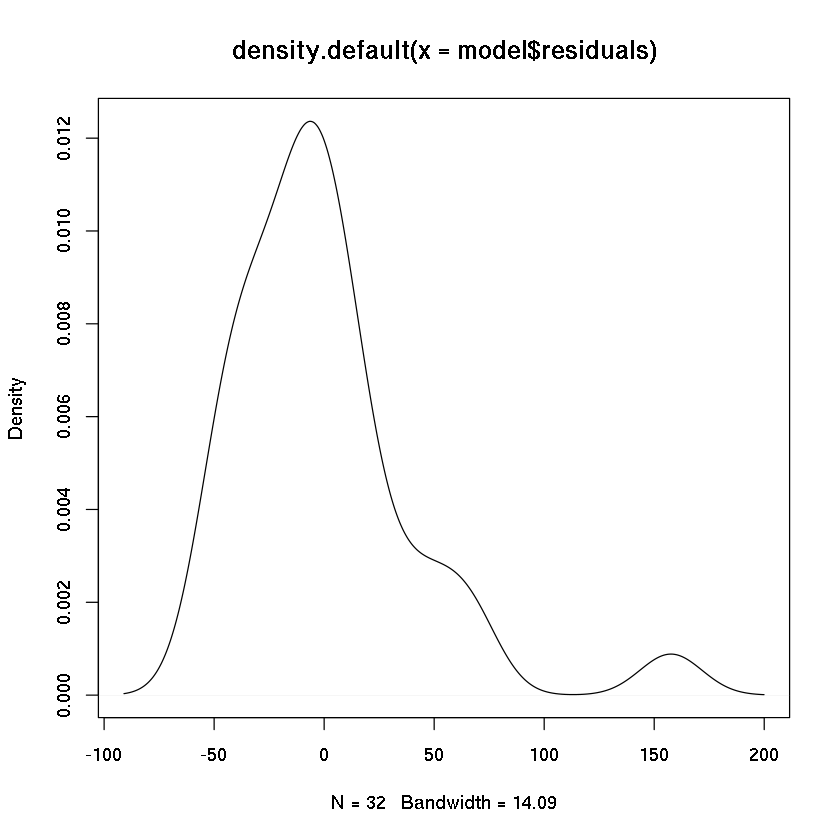

In [105]:
plot(density(model$residuals))

overall, the residuals are __not really normally distributed__ but they are probably normal enough for the regression to be valid. 

Lets check the model assumptions

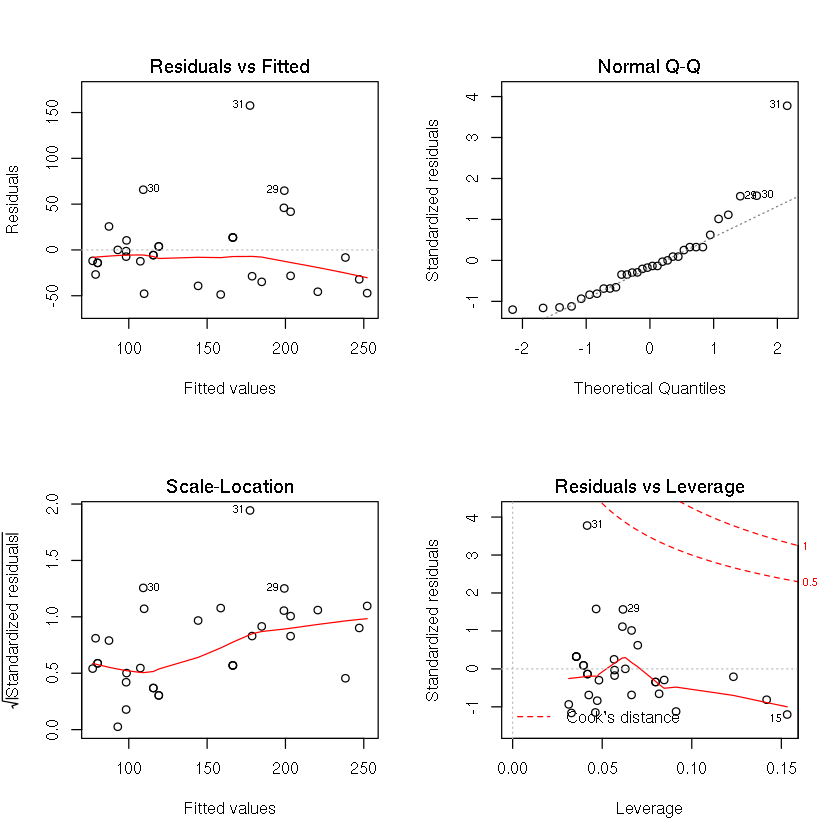

In [106]:
op = par(mfrow = c(2,2))
plot(model)

The `normral Q-Q plot` does show that we may have one outlier (point 31). We could refit the model without it to see if it fits better:

In [107]:
op = par(mfrow = c(2,2))
model2 <- lm(hp[-31] ~ disp[-31])
summary(model2)


Call:
lm(formula = hp[-31] ~ disp[-31])

Residuals:
    Min      1Q  Median      3Q     Max 
-44.704 -21.601  -2.255  16.349  72.767 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   46.146     11.883   3.883 0.000548 ***
disp[-31]     25.232      2.793   9.033 6.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.41 on 29 degrees of freedom
Multiple R-squared:  0.7378,	Adjusted R-squared:  0.7287 
F-statistic:  81.6 on 1 and 29 DF,  p-value: 6.291e-10


removing the outlier _really improves_ the model fit - the \\(R^2\\) increased to 0.729, and the residual look must more normal (the `Q-Q plot` is __more linear__)

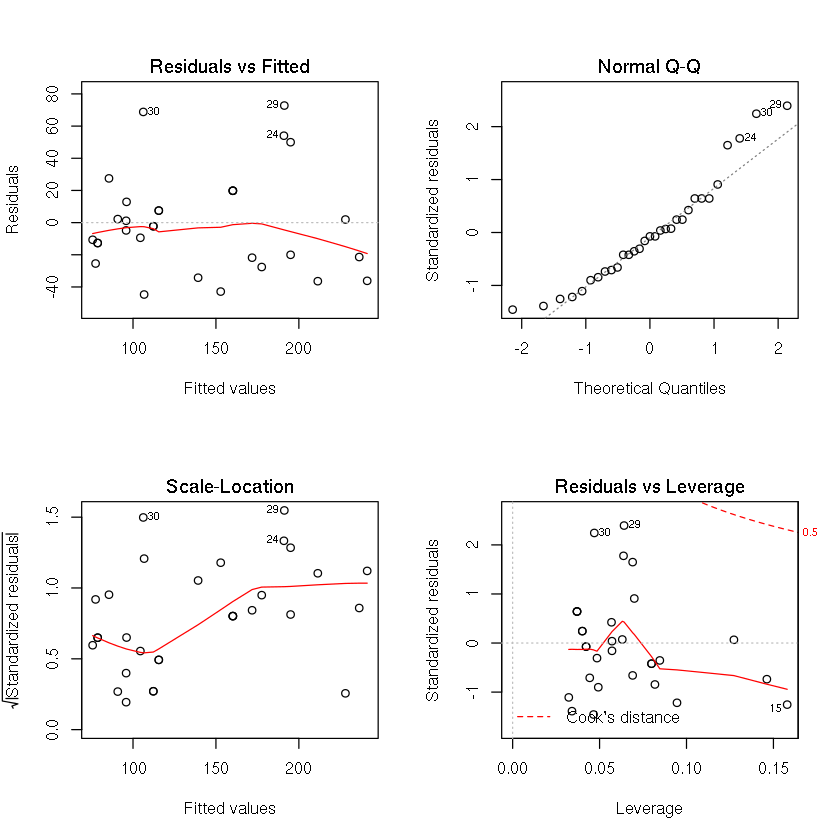

In [109]:
op = par(mfrow = c(2,2))
plot(model2)

In [111]:
par(op)

### Qualitative and Quantitative Variables

we use similar tooks for two these types of variables:
ex ___do we expect a difference in horsepower between cars with automatic and manual transmissions?___

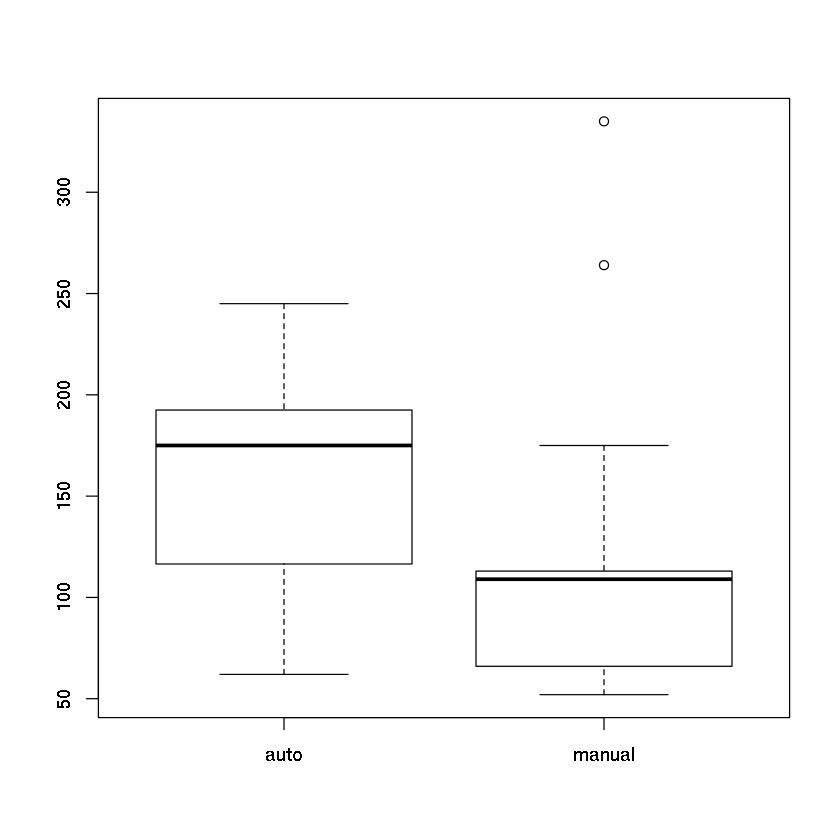

In [112]:
plot(am, hp)

__interpredation__
It appears more cars with automatic transmission are generally more powrful, those the two more powerful cars have manual transmissions. 

##### Two Sample T-Test
we can use the ___two-samlpe T-Test___ to see if these groups are differend.

In [113]:
t.test(hp ~ am)


	Welch Two Sample t-test

data:  hp by am
t = 1.2662, df = 18.715, p-value = 0.221
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -21.87858  88.71259
sample estimates:
  mean in group auto mean in group manual 
            160.2632             126.8462 


This show that the means are not different - likely the influence of the two “super-cars” with manual
transmissions pulls the mean up enough to mask the difference.

### ANOVA

`oneway.test()` for a simple ANOVA could be used if we had more than two groups. 
        * For two groups this is equivlent ot the `t-test` but it will work for mor than 2 groups. 
        
___ANOVA___ also uses the `lm()` like we saw in regression, which we can think of ANOVA as a kind of regression, where _the predictor variable (x-axis) is categorical_. 

> NOTE: lm() and oneway.test() will return errors if you use a factor as the response variable, so recall
that “~” should be read as “as a function of”, so that cyl~hp is “cylinders (factor in our case) ~ horsepower”
would not work here.

In [114]:
oneway.test(hp ~ am)


	One-way analysis of means (not assuming equal variances)

data:  hp and am
F = 1.6032, num df = 1.000, denom df = 18.715, p-value = 0.221


In [115]:
oneway.test(hp ~ cyl)


	One-way analysis of means (not assuming equal variances)

data:  hp and cyl
F = 35.381, num df = 2.000, denom df = 16.514, p-value = 1.071e-06


In [116]:
summary(lm(hp ~ cyl))


Call:
lm(formula = hp ~ cyl)

Residuals:
   Min     1Q Median     3Q    Max 
-59.21 -22.78  -8.25  15.97 125.79 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    82.64      11.43   7.228 5.86e-08 ***
cyl6           39.65      18.33   2.163   0.0389 *  
cyl8          126.58      15.28   8.285 3.92e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.92 on 29 degrees of freedom
Multiple R-squared:  0.7139,	Adjusted R-squared:  0.6941 
F-statistic: 36.18 on 2 and 29 DF,  p-value: 1.319e-08
